<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

In [ ]:
def jaccard(img_array,img_arrayf,t):
    ME = 0
    dimensao = img_arrayf.shape

    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if int(img_arrayf[i,j]) - int(img_array[i,j]) > 0 and (int(img_arrayf[i,j]) - int(img_array[i,j])) <=t:
                ME += 1
            elif (int(img_arrayf[i,j]) - int(img_array[i,j]))*(-1) <= t:
                ME +=1
    ME = ME/(dimensao[0]*dimensao[1])
    print("Coeficiente de Jaccard com tolerância", t,":",ME)

digite a media da gaussiana: 128
digite o desvio da gaussana: 200


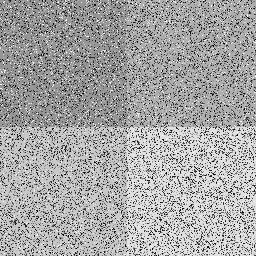

In [ ]:
#abre a imagem e converte em array
img = Image.open('c.jpg').convert('L')
img_array = np.array(img)

def create_gaussian_mask(img_shape, mean, std):
    def gaussiana(x, mean, std):
        return 1 / (std * math.sqrt(2 * math.pi)) * math.exp(-(((x - mean) ** 2) / (2 * (std ** 2))))
    #número total de pixels na imagem
    num_pixels = img_shape[0] * img_shape[1]
    #vai armazenar a frequencia de ocorrencia de cada valor de cinza na imagem
    frequencia_ocorrencia = np.zeros(256)
    for i in range(256):
        frequencia_ocorrencia[i] = gaussiana(i, mean, std)
    #multiplica a frequencia de ocorrencia pelo numero de pixels na imagem, para
    #poder aplicá-los aleatoriamente na máscara.
    frequencia_ocorrencia *= num_pixels
    noise_mask = np.zeros(img_shape)
    available_indices = list(range(num_pixels))
    #enquanto ainda houver algum valor a ser aplicado
    while np.sum(frequencia_ocorrencia) > 0:
        #seleciona índice aleatório da máscara
        index = random.choice(available_indices)
        #pega posição do índice na matriz
        x, y = np.unravel_index(index, img_shape)
        #seleciona um valor de nível de cinza aleatóriamente com base no vetor de  probabilidade p
        pixel_value = np.random.choice(256, p=frequencia_ocorrencia/np.sum(frequencia_ocorrencia))
        #aplica valor à imagem
        noise_mask[x, y] = pixel_value
        #decrementa valor da frequencia de ocorrencia
        frequencia_ocorrencia[pixel_value] -= 1
        if frequencia_ocorrencia[pixel_value] <= 0:
            frequencia_ocorrencia[pixel_value] = 0
            available_indices.remove(index)
    return noise_mask

mean = int(input("digite a media da gaussiana: "))
std = int(input("digite o desvio da gaussana: "))
gaussian_noise_mask = create_gaussian_mask(img_array.shape, mean, std)

img_gauss = np.array(img)
for i in range(0,img_gauss.shape[0]):
    for j in range(0,img_gauss.shape[1]):
        if gaussian_noise_mask[i][j]!=0:
            img_gauss[i][j] = gaussian_noise_mask[i][j]

Image.fromarray(img_gauss).show()

digite a probabilidade de um pixel ser substituido no sal e pimenta (entre 0 e 1): 0.2


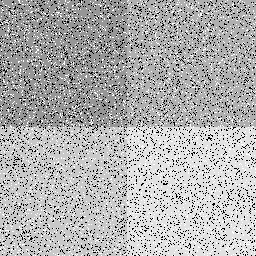

In [ ]:
prob = float(input("digite a probabilidade de um pixel ser substituido no sal e pimenta (entre 0 e 1): "))
img_salt_pepper = np.array(img)
for i in range(0,img_salt_pepper.shape[0]):
    for j in range(0,img_salt_pepper.shape[1]):
        if random.random() < prob:
            if(random.random()<=0.5):
                img_salt_pepper[i][j] = 0
            else:
                img_salt_pepper[i][j] = 255

Image.fromarray(img_salt_pepper).show()

In [ ]:
def filtro_media_mediana(img_array, mask, type):
    img_width = img_array.shape[1]
    img_height = img_array.shape[0]
    mask_width = mask.shape[1]
    mask_height = mask.shape[0]
    #adiciona preenchimento nas bordas da imagem para manter tamanho original
    #o preenchimento terá mesmo valor do vizinho "mode='edge'"
    padding_with = (mask_width - 1) // 2
    padding_height = (mask_height - 1) // 2
    padded_img_array = np.pad(img_array, (padding_height, padding_with), mode='edge')
    resulting_array = np.zeros_like(img_array, dtype=np.uint8)
    for i in range(padding_height, img_height + padding_height):
        for j in range(padding_with, img_width + padding_with):
            neighborhood = padded_img_array[i-padding_height:i+padding_height+1, j-padding_with:j+padding_with+1]
            #pega valor da media multiplicado pelos pesos da máscara
            if(type == 'mean'):#média
              value = np.mean(neighborhood * mask)
            elif(type == 'median'):#mediana
              value = np.median(neighborhood * mask)
            elif(type == 'weighted'):#ponderada
              value = np.average(neighborhood, weights=mask)
            resulting_array[i-padding_height][j-padding_with] = value
    return resulting_array

def create_gaussian_mask(size):
    def coeficiente_binomial(n, k):
        return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

    def triangulo_pascal(n):
        triangle = np.zeros((n, n), dtype=np.int32)
        for i in range(n):
            for j in range(i+1):
                triangle[i][j] = coeficiente_binomial(i, j)
        return triangle

    triangle = triangulo_pascal(size)
    mask = np.outer(triangle[-1], triangle[-1])
    return mask

print(create_gaussian_mask(5))

[[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]]


filtros na imagem com ruído sal e pimenta

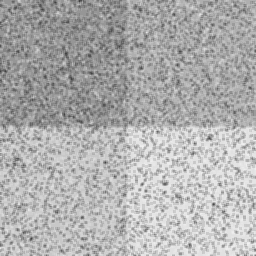

Coeficiente de Jaccard com tolerância 0 : 0.411102294921875


In [ ]:
#média 3x3
noisy_array = filtro_media_mediana(img_salt_pepper,np.ones((3,3)),"mean")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

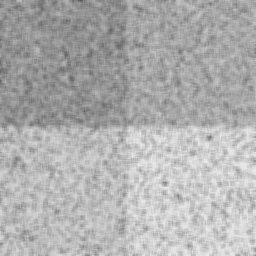

Coeficiente de Jaccard com tolerância 0 : 0.192352294921875


In [ ]:
#média 5x5
noisy_array = filtro_media_mediana(img_salt_pepper,np.ones((5,5)),"mean")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

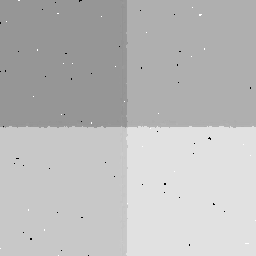

Coeficiente de Jaccard com tolerância 0 : 0.975830078125


In [ ]:
#mediana 3x3
noisy_array = filtro_media_mediana(img_salt_pepper,np.ones((3,3)),"median")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

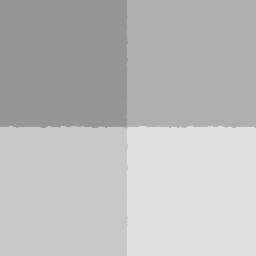

Coeficiente de Jaccard com tolerância 0 : 0.9792022705078125


In [ ]:
#mediana 5x5
noisy_array = filtro_media_mediana(img_salt_pepper,np.ones((5,5)),"median")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

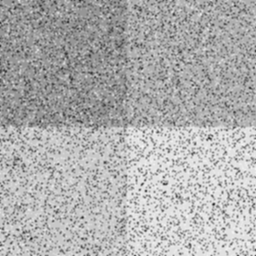

Coeficiente de Jaccard com tolerância 0 : 0.438568115234375


In [ ]:
#gaussiano 3x3
noisy_array = filtro_media_mediana(img_salt_pepper,create_gaussian_mask(3),"weighted")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)


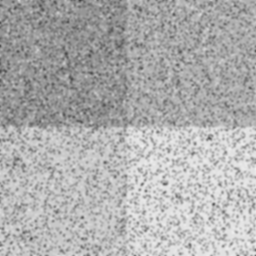

Coeficiente de Jaccard com tolerância 0 : 0.276458740234375


In [ ]:
#gaussiano 5x5
noisy_array = filtro_media_mediana(img_salt_pepper,create_gaussian_mask(5),"weighted")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)


filtros na imagem com ruído gaussiano

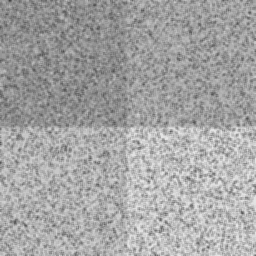

Coeficiente de Jaccard com tolerância 0 : 0.1345062255859375


In [ ]:
#média 3x3
noisy_array = filtro_media_mediana(img_gauss,np.ones((3,3)),"mean")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

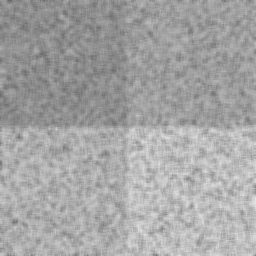

Coeficiente de Jaccard com tolerância 0 : 0.05230712890625


In [ ]:
#média 5x5
noisy_array = filtro_media_mediana(img_gauss,np.ones((5,5)),"mean")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)


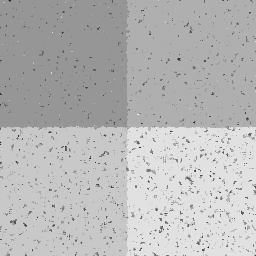

Coeficiente de Jaccard com tolerância 0 : 0.886566162109375


In [ ]:
#mediana 3x3
noisy_array = filtro_media_mediana(img_gauss,np.ones((3,3)),"median")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

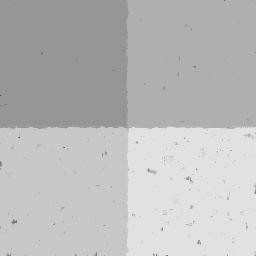

Coeficiente de Jaccard com tolerância 0 : 0.9487152099609375


In [ ]:
#mediana 5x5
noisy_array = filtro_media_mediana(img_gauss,np.ones((5,5)),"median")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

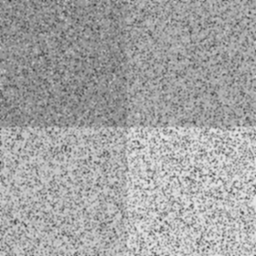

Coeficiente de Jaccard com tolerância 0 : 0.148101806640625


In [ ]:
#gaussiano 3x3
noisy_array = filtro_media_mediana(img_gauss,create_gaussian_mask(3),"weighted")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)

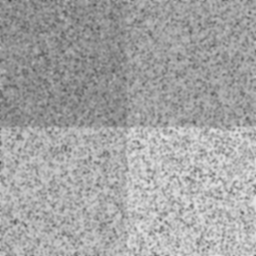

Coeficiente de Jaccard com tolerância 0 : 0.0833740234375


In [ ]:
#gaussiano 5x5
noisy_array = filtro_media_mediana(img_gauss,create_gaussian_mask(5),"weighted")
Image.fromarray(noisy_array).show()
jaccard(img_array,noisy_array,0)